# Molten-Cores

#### Team Members: Arrisa, Evan, Maulika, Rafail, Sophia

![img_happy](https://www.plays-in-business.com/wp-content/uploads/2018/12/the-happiness-index.jpg)



## EDA: 

## Cleanup



In [4]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
suicide_risk = pd.read_csv("foreveralone.csv")

In [5]:
suicide_risk.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [12]:
test_list = [item for item in suicide_risk["gender"].value_counts().values]

In [13]:
test_list

[393, 73, 2, 1]

In [14]:
suicide_risk["gender"].value_counts()

Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64

Text(0, 0.5, 'Scores')

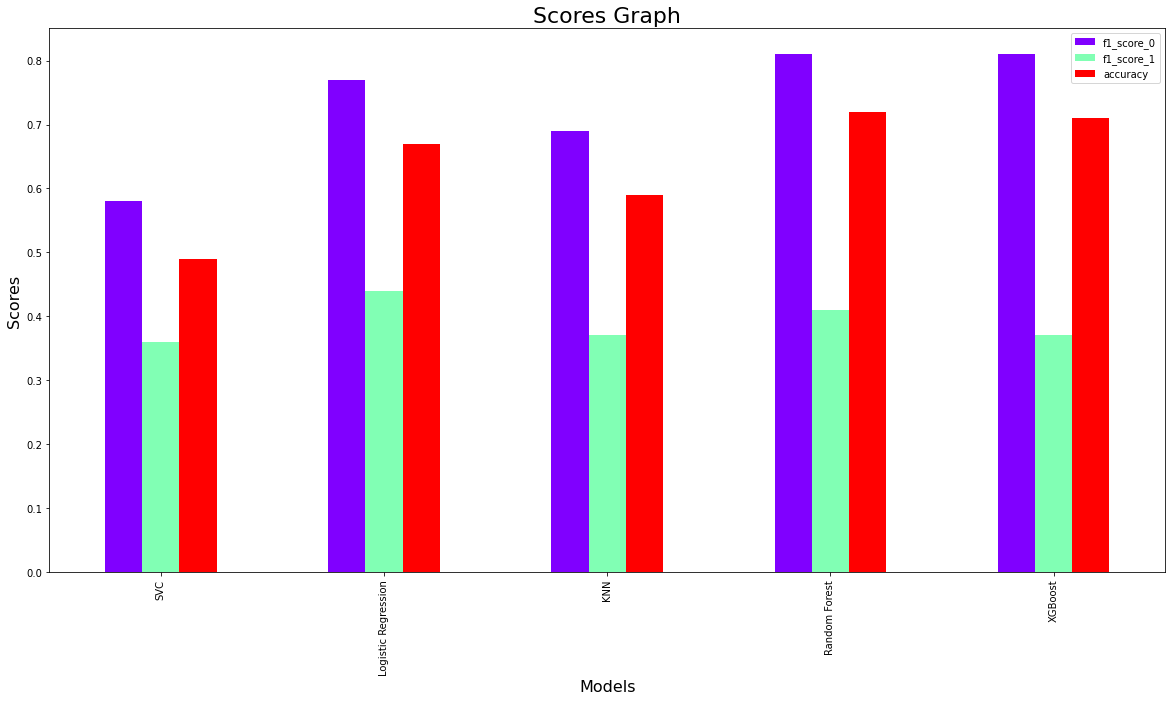

In [3]:
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt


# Data to plot
plotdata = pd.DataFrame({
    "f1_score_0":[0.58, 0.77, 0.69, 0.81, 0.81],
    "f1_score_1":[0.36, 0.44, 0.37, 0.41, 0.37],
    "accuracy":[0.49, 0.67, 0.59, 0.72, 0.71]}, 
    index=["SVC", "Logistic Regression", "KNN", "Random Forest", "XGBoost"])

# Plotting
plotdata.plot(kind="bar", figsize = (20,10), colormap = cm.get_cmap('rainbow'))


# Titles
plt.title("Scores Graph", size = 22)
plt.xlabel("Models", size = 16)
plt.ylabel("Scores", size = 16)

In [2]:
import seaborn as sns

<AxesSubplot:ylabel='attempt_suicide'>

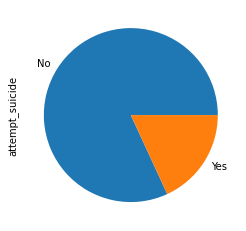

In [9]:
suicide_risk["attempt_suicide"].value_counts().plot(kind="pie")

In [21]:
import plotly.express as px
 

fig = px.bar(suicide_risk, x="race", y="age", color="attempt_suicide", barmode = 'stack')
 
fig.show()

/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='attempt_suicide', ylabel='age'>

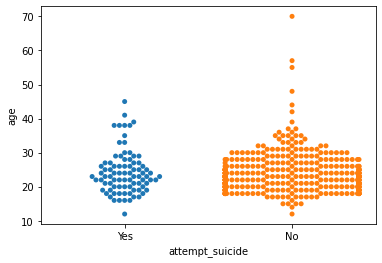

In [30]:
# sns.violinplot(x ='attempt_suicide', y ='age', data = suicide_risk)
sns.swarmplot(x ='attempt_suicide', y ='age', data = suicide_risk)

In [24]:
#LMAO GOOD LUCK ! - XGBOOST

#I don't need luck for where I'm cleaning ! - Certified Data Janitor


columns_to_drop = ["time"]
suicide_risk.drop(columns_to_drop, axis=1, inplace=True)

race_freq = (suicide_risk['race'].value_counts())/suicide_risk.shape[0]
less_freq_race = race_freq[race_freq<=0.04]
suicide_risk.loc[suicide_risk['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
suicide_risk["race"].value_counts()

paysex_freq = (suicide_risk['pay_for_sex'].value_counts())/suicide_risk.shape[0]
less_freq_paysex = paysex_freq[paysex_freq<=0.3]
suicide_risk.loc[suicide_risk['pay_for_sex'].isin(less_freq_paysex.index.tolist()), "pay_for_sex"] = "Yes"
suicide_risk["pay_for_sex"].value_counts()

sxlty_freq = (suicide_risk['sexuallity'].value_counts())/suicide_risk.shape[0]
less_freq_sxlty = sxlty_freq[sxlty_freq<=0.1]
suicide_risk.loc[suicide_risk['sexuallity'].isin(less_freq_sxlty.index.tolist()), "sexuallity"] = "Bi/Gay/Lesbian"
suicide_risk["sexuallity"].value_counts()

help_freq = (suicide_risk['what_help_from_others'].value_counts())/suicide_risk.shape[0]
less_freq_help = help_freq[help_freq<=0.15]
suicide_risk.loc[suicide_risk['what_help_from_others'].isin(less_freq_help.index.tolist()), "what_help_from_others"] = "Some form of help"
suicide_risk["what_help_from_others"].value_counts()

suicide_risk = suicide_risk.replace({'employment':  {'A homemaker': "Employed", 'Retired': "Unemployed", 'Military': "Employed", 'Unable to work': "Unemployed", 'Self-employed': "Employed", 'Out of work and looking for work': "Unemployed", 'Out of work but not currently looking for work': "Unemployed", 'Employed for wages': "Employed", 'A student': "Student"}})

suicide_risk.loc[suicide_risk['gender'].isin(["Transgender female"]),"gender"] = "Female"
suicide_risk.loc[suicide_risk['gender'].isin(["Transgender male"]),"gender"] = "Male"

suicide_risk =suicide_risk.astype({"improve_yourself_how": str})

suicide_risk.loc[suicide_risk.improve_yourself_how.str.contains("Therapy"), "improve_yourself_how"] = "Therapy"
suicide_risk.loc[suicide_risk.improve_yourself_how.str.contains("gym"), "improve_yourself_how"] = "Go to/join a gym"

improve_freq = (suicide_risk['improve_yourself_how'].value_counts())/suicide_risk.shape[0]
less_freq_improve = improve_freq[improve_freq<=0.2]
suicide_risk.loc[suicide_risk['improve_yourself_how'].isin(less_freq_improve.index.tolist()), "improve_yourself_how"] = "Other"
suicide_risk["improve_yourself_how"].value_counts()

Therapy             130
Go to/join a gym    124
Other               109
None                106
Name: improve_yourself_how, dtype: int64

In [16]:
suicide_risk[suicide_risk.improve_yourself_how.str.contains("Therapy")]["improve_yourself_how"].value_counts()

Therapy                                                                                                                                                                                21
Joined a gym/go to the gym, Therapy                                                                                                                                                    20
Joined a gym/go to the gym, Therapy, Other exercise, join clubs/socual clubs/meet ups                                                                                                  20
Therapy, Other exercise                                                                                                                                                                16
Joined a gym/go to the gym, Therapy, join clubs/socual clubs/meet ups                                                                                                                  10
Therapy, Other exercise, join clubs/socual clubs/meet ups             

In [21]:
px.scatter_3d(happiness_report, x = 'Social support', y = 'Freedom to make life choices', z = 'Score', color = '#1f77b4')

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Country or region', 'Score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'] but received: #1f77b4

In [0]:
import matplotlib.pyplot as plt


happin.plot.scatter(x='Flipper Length (mm)', y='Culmen Depth (mm)', c='DarkBlue')

In [0]:
#pie chart

In [0]:
happiness_report[happiness_report["Healthy life expectancy"] == "Netherlands"